# WhatsApp Chat Data Analysis

I have planned to do a brief data analysis on the WhatsApp Chat to get a better understanding of the type of messages, timeline of the messages and to obtain a brief statistics of the messages I receive over whatsapp. I have extracted the chat from one of my college whatsapp group and have exported here to analyze it. Here, I would be using various python libraries like numpy, pandas, regex, nltk, matplotlib, seaborn etc to get a clear visualization of the data.

### Installing the required modules

In [1]:
pip install urlextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 8.0 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=64364be5150a77c400c9fb7aa6f68c2d4ce3e16a5db20de2f0132387300bdbf7
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


### Importing Libraries

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urlextract import URLExtract
from wordcloud import WordCloud
from collections import Counter
import emoji

### Importing the Whatsapp Chat text file

In [4]:
f = open('WhatsApp Chat with Aero19.txt', 'r', encoding = 'utf-8')

In [5]:
data = f.read()

In [6]:
type(data)

str

In [7]:
pattern = '\d{1,2}[\/]\d{1,2}[\/]\d{2,4}, \d{1,2}:\d{1,2} [a|p]m - '

In [8]:
messages = re.split(pattern, data)[1:]

In [9]:
dates = re.findall(pattern, data)

A dataframe is formed with user_message and date as columns obtained using regex through split function with respect to the pattern mentioned.

In [ ]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %I:%M %p - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2019-07-25 08:45:00
1,"Amarnaath Iitm created group ""Aero Freshies '1...",2019-07-03 09:00:00
2,You joined using this group's invite link\n,2019-07-25 08:44:00
3,+91 81717 00616 joined using this group's invi...,2019-07-25 08:45:00
4,+91 90818 25678 joined using this group's invi...,2019-07-25 09:35:00


In [ ]:
df.shape

(30254, 2)

In [ ]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?): ', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

In [ ]:
df['user'] = users
df['message'] = messages

Once again using regex split function, the dataset is further being splitted dividing the user_messages into usernames and the specific messages. All the group notification messages are being assigned to a user named as group_notification to avoid confusion.

In [ ]:
df

,user_message,date,user,message
0,Messages and calls are end-to-end encrypted. N...,2019-07-25 08:45:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,"Amarnaath Iitm created group ""Aero Freshies '1...",2019-07-03 09:00:00,group_notification,"Amarnaath Iitm created group ""Aero Freshies '1..."
2,You joined using this group's invite link\n,2019-07-25 08:44:00,group_notification,You joined using this group's invite link\n
3,+91 81717 00616 joined using this group's invi...,2019-07-25 08:45:00,group_notification,+91 81717 00616 joined using this group's invi...
4,+91 90818 25678 joined using this group's invi...,2019-07-25 09:35:00,group_notification,+91 90818 25678 joined using this group's invi...
...,...,...,...,...
30249,Sai S Kalyan Iitm: https://chat.whatsapp.com/H...,2022-07-08 21:10:00,Sai S Kalyan Iitm,https://chat.whatsapp.com/HgroW4nBLRHBflZPdtds...
30250,SSS Thop Aero removed Atharva Iitm\n,2022-07-08 21:10:00,group_notification,SSS Thop Aero removed Atharva Iitm\n
30251,Sai S Kalyan Iitm: <Media omitted>\n,2022-07-08 21:14:00,Sai S Kalyan Iitm,<Media omitted>\n
30252,SSS Thop Aero added Atharva Iitm\n,2022-07-08 21:18:00,group_notification,SSS Thop Aero added Atharva Iitm\n


The date column is also split into various sub branches like year, month, day, hour, minute and many more using the dt attribute of datetime in pandas and have been added into the dataset using separate columns.

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['month_num'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['only_date'] = df['date'].dt.date
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute



df.head()

,user_message,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute
0,Messages and calls are end-to-end encrypted. N...,2019-07-25 08:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2019,July,7,25,2019-07-25,Thursday,8,45
1,"Amarnaath Iitm created group ""Aero Freshies '1...",2019-07-03 09:00:00,group_notification,"Amarnaath Iitm created group ""Aero Freshies '1...",2019,July,7,3,2019-07-03,Wednesday,9,0
2,You joined using this group's invite link\n,2019-07-25 08:44:00,group_notification,You joined using this group's invite link\n,2019,July,7,25,2019-07-25,Thursday,8,44
3,+91 81717 00616 joined using this group's invi...,2019-07-25 08:45:00,group_notification,+91 81717 00616 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,8,45
4,+91 90818 25678 joined using this group's invi...,2019-07-25 09:35:00,group_notification,+91 90818 25678 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,9,35


In [ ]:
df.drop(columns = ['user_message'], inplace = True, axis = 1)

This would be the final dataset, df which we would be using to analyze the chat data.

In [ ]:
df

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute
0,2019-07-25 08:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2019,July,7,25,2019-07-25,Thursday,8,45
1,2019-07-03 09:00:00,group_notification,"Amarnaath Iitm created group ""Aero Freshies '1...",2019,July,7,3,2019-07-03,Wednesday,9,0
2,2019-07-25 08:44:00,group_notification,You joined using this group's invite link\n,2019,July,7,25,2019-07-25,Thursday,8,44
3,2019-07-25 08:45:00,group_notification,+91 81717 00616 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,8,45
4,2019-07-25 09:35:00,group_notification,+91 90818 25678 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,9,35
...,...,...,...,...,...,...,...,...,...,...,...
30249,2022-07-08 21:10:00,Sai S Kalyan Iitm,https://chat.whatsapp.com/HgroW4nBLRHBflZPdtds...,2022,July,7,8,2022-07-08,Friday,21,10
30250,2022-07-08 21:10:00,group_notification,SSS Thop Aero removed Atharva Iitm\n,2022,July,7,8,2022-07-08,Friday,21,10
30251,2022-07-08 21:14:00,Sai S Kalyan Iitm,<Media omitted>\n,2022,July,7,8,2022-07-08,Friday,21,14
30252,2022-07-08 21:18:00,group_notification,SSS Thop Aero added Atharva Iitm\n,2022,July,7,8,2022-07-08,Friday,21,18


## Statistical Analysis

In [ ]:
user_list = df['user'].unique().tolist()
user_list

['group_notification',
 'Shailesh Iitm Aero',
 'Muthu Kumar Iitm',
 '+91 90810 02448',
 'Vaibhav Iitm Aero',
 'SSS Thop Aero',
 'Bharat Iitm',
 'Amarnaath Iitm',
 '+91 97105 17002',
 'Sai Pavan',
 'Naaimisha Iitm',
 'Chaitanya Iitm',
 'Atharva Iitm',
 'Surabhi Iitm',
 'Amogh Rggg',
 '+91 81717 00616',
 'Sai S Kalyan Iitm',
 '+91 90818 25678',
 'Nihal Puram Iitm',
 '+91 832 724 9608',
 'ShantiPrasanna',
 'Adarsh Iitm',
 'Bhagya Iitm',
 'Piyushiitm',
 'Surya Iitm Aero',
 'Vikky Iitm Aero',
 'Shiva Surya AE',
 'Kunal Vartia Iitm',
 '+91 76099 16138',
 'Althaaf Nazaar',
 '+91 88709 66930',
 '+91 93611 96108',
 'John Aero Iitm',
 'Aaditya Iitm Aero',
 '+91 94189 33424',
 'Ram Prakash Iitm Aero',
 'Abhinav Nahata Iitm',
 'Kushwanth',
 'Aaditya Aerospace',
 'Sudarshan Iitm',
 'Srinivas N',
 'VijayaBhanu AE Iitm',
 'Sreya Proxy',
 '+91 93061 37386',
 'Karthik Iitm',
 'Geetha Krishna',
 '+91 6377 089 289',
 '+91 70254 72913',
 'Bharat BBC iitm',
 '+91 77024 79742',
 '+91 72402 92863',
 'Drishti

In [ ]:
user_list.remove('group_notification')
user_list.sort()
user_list

['+91 6372 723 436',
 '+91 6377 089 289',
 '+91 6378 207 487',
 '+91 70254 72913',
 '+91 72402 92863',
 '+91 73959 70136',
 '+91 74012 30037',
 '+91 75882 01737',
 '+91 76099 16138',
 '+91 77024 79742',
 '+91 78358 66894',
 '+91 81717 00616',
 '+91 832 724 9608',
 '+91 83204 20325',
 '+91 83479 49700',
 '+91 86887 37059',
 '+91 88709 66930',
 '+91 90049 39490',
 '+91 90810 02448',
 '+91 90818 25678',
 '+91 91828 78214',
 '+91 93061 37386',
 '+91 93611 96108',
 '+91 94096 59393',
 '+91 94189 33424',
 '+91 94229 46472',
 '+91 94450 77363',
 '+91 94451 54778',
 '+91 95154 16950',
 '+91 95185 85871',
 '+91 97105 17002',
 '+91 98843 53726',
 '+91 98907 95444',
 '+91 98953 05680',
 '+91 99459 31972',
 '+91 99479 41400',
 'Aaditya Aerospace',
 'Aaditya Iitm Aero',
 'Abhilash Iitm',
 'Abhinav Nahata Iitm',
 'Adarsh Iitm',
 'Adithyan Iitm',
 'Althaaf Nazaar',
 'Amarnaath Iitm',
 'Amogh Rggg',
 'Atharva Iitm',
 'Bapu Gayatri Iitm',
 'Bhagya Iitm',
 'Bharat BBC iitm',
 'Bharat Iitm',
 'Chaitanya 

In [ ]:
len(user_list)

83

This shows that, from the day it is created there are 83 users involved in this whatsapp group.

In [ ]:
def fetch_stats(selected_user, df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  # Number of messages and total number of words
  num_messages = df.shape[0]
  words = []
  for message in df['message']:
    words.extend(message.split())

  # Number of media messages
  num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

  # Number of links shared
  extract = URLExtract()
  links = []
  for message in df['message']:
    links.extend(extract.find_urls(message))


  print("Total Number of Messages - {}, Total Number of Words - {}, Number of Media shared - {}, Number of links shared - {}".format(num_messages, len(words), num_media_messages, len(links)))

The fetch_stats(selected_user, df) function returns some of the Statistical analysis of the chats of the group, both overall as a group and of a selected user of the group. It returns total number of messages and words involved in the chat and also we would get to know how many media and links are being shared over the group both overall and by an user shared to the group.

In [ ]:
fetch_stats('Overall', df)

Total Number of Messages - 30254, Total Number of Words - 214664, Number of Media shared - 2350, Number of links shared - 761


In [ ]:
fetch_stats('Srinivas N', df)

Total Number of Messages - 547, Total Number of Words - 2020, Number of Media shared - 33, Number of links shared - 6


We could ge to know about the busiest persons of the group, who basically being active sends too many messages. most_busy_users(df) function returns top 5 busiest users of the group. A bar graph is plotted to obtain a better view of this stat.

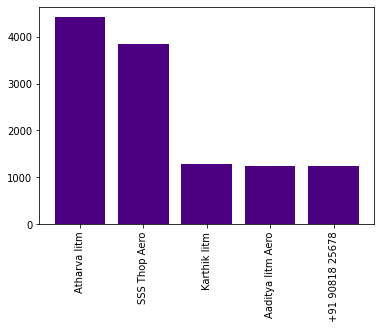

,name,percent
0,Atharva Iitm,14.61
1,SSS Thop Aero,12.70
2,Karthik Iitm,4.22
3,Aaditya Iitm Aero,4.12
4,+91 90818 25678,4.11
...,...,...
79,+91 95185 85871,0.01
80,Ram Prakash Iitm Aero,0.00
81,+91 94450 77363,0.00
82,+91 95154 16950,0.00


In [ ]:
# Busiest users in the group
def most_busy_users(df):
  x = df['user'].value_counts().head()
  new_df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
  plt.bar(x.index, x.values, color = 'indigo')
  plt.rcParams['figure.figsize'] = [15, 15]
  plt.xticks(rotation = 'vertical')
  plt.show()
  return new_df

most_busy_users(df)

In [ ]:
# most common used words

def most_common_words(selected_user, df):
  f = open('stop_hinglish.txt', 'r')
  stop_words = f.read()

  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  temp = df[df['user'] != 'group_notification']
  temp = temp[temp['message'] != '<Media omitted>\n']  

  words = []
  for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

  most_common_df = pd.DataFrame(Counter(words).most_common(20))
  
  plt.barh(most_common_df[0], most_common_df[1], color = 'green')
  plt.xticks(rotation = 'vertical')
  plt.title('Most Common Words', fontsize = 25)
  plt.show()
  return most_common_df


most_common_words(selected_user, df) function returns most common used words in the messages of both overall as a group and of a selected user of the group. Here, I have used a file named stop_hinglish.txt having some unwanted texts (the words like 'a', 'the', 'is' and many more Indianized chat words ) and this acts a stop words here and filters the words required in this analysis.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


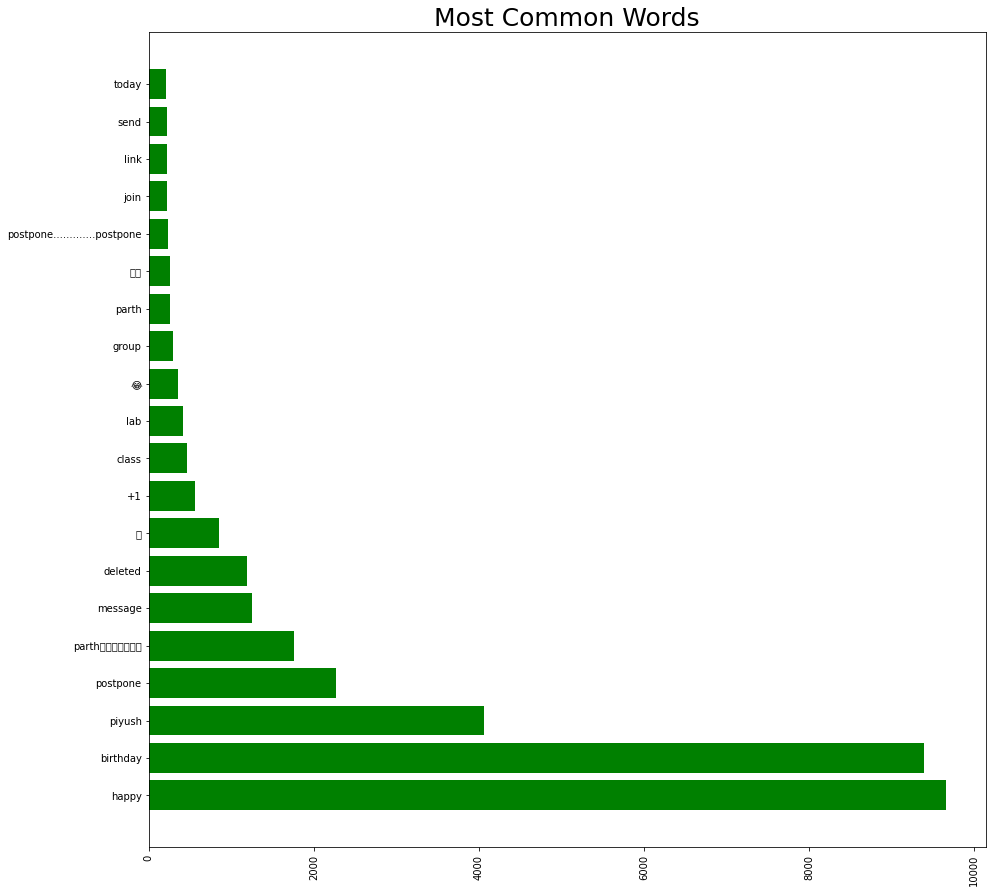

,0,1
0,happy,9657
1,birthday,9395
2,piyush,4056
3,postpone,2270
4,parth🥳🥳🥳🥳🔥🔥🔥,1761
5,message,1248
6,deleted,1194
7,🔥,854
8,+1,563
9,class,464


In [ ]:
most_common_words('Overall', df)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0, flags=flags)


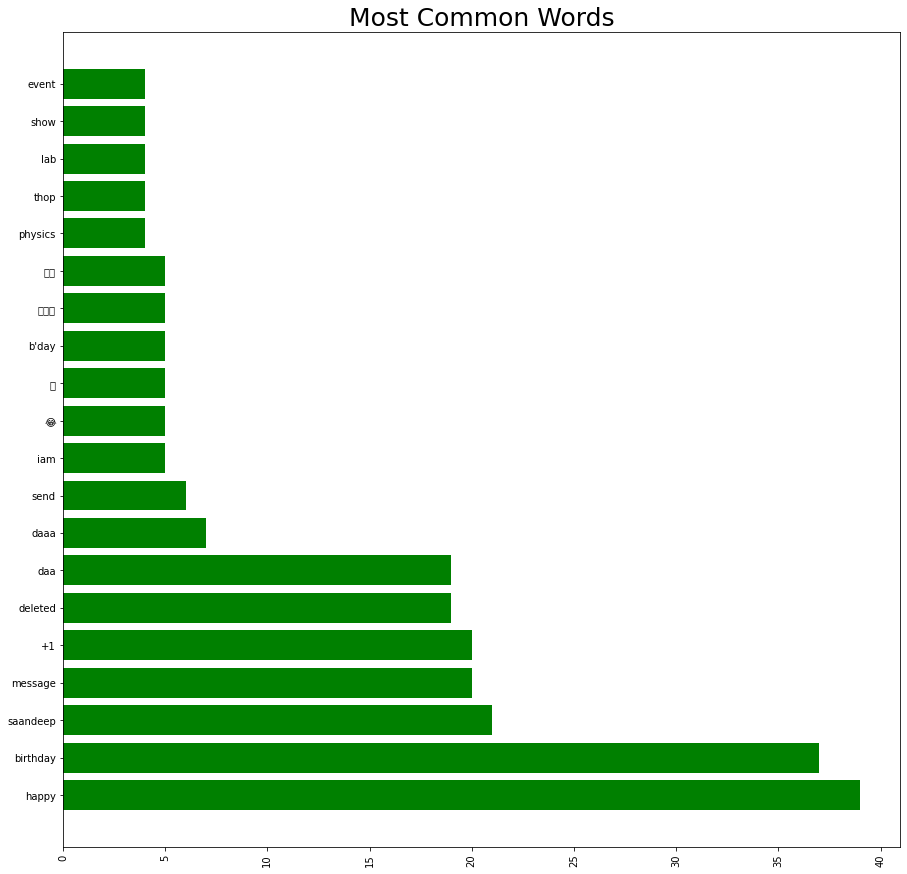

,0,1
0,happy,39
1,birthday,37
2,saandeep,21
3,message,20
4,+1,20
5,deleted,19
6,daa,19
7,daaa,7
8,send,6
9,iam,5


In [ ]:
most_common_words('Srinivas N', df)

### Most common words using NLP

The libraries required for the Natural Language Processing are being downloaded here.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk import FreqDist

We can obtain most common used words in the messages using NLP as well and here we are doing it. Here we use word_tokenize() to split the text into tokens or words and the also the punctuation from string is used as one of the source for unwanted texts which filters the punctuations involved in the texts. Stopwords of nltk.corpus has stop words and we can get them by mentioning the language (here English) and it acts as stop words helping in filtering the words required for the analysis. Also, I have used stop_hinglish.txt as another source of stop words and used it here as well in filtering the words. Mainly here I have implemented regex which is compiled with pattern '[a-zA-Z]' which matches only with the alphabetic words (to be precise, words which starts with alphabetic words) where numbers and other extras like punctuations are not being involved. Strictly speaking it only analyses alphabetical words and returns the most common used alphabetical words.

In [ ]:
def most_common_words_nlp_with_regex(selected_user, df):
  f = open('stop_hinglish.txt', 'r')
  stop_words = f.read()

  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  temp = df[df['user'] != 'group_notification']
  temp = temp[temp['message'] != '<Media omitted>\n']

  tempar = ""
  for char in temp['message']:
    if char not in punctuation:
      tempar += char
  words = word_tokenize(tempar)

  sw = set(stopwords.words("english"))
  filterd_words = [w.lower() for w in words if w not in sw]


  new_words = []
  for wor in filterd_words:
    if wor not in stop_words:
      new_words.append(wor)

  regex = re.compile('[a-zA-Z]')

  filtered = [i for i in new_words if regex.match(i)]

  filtered = FreqDist(filtered)
  most_common_df_nlp = pd.DataFrame(filtered.most_common(20))
  return most_common_df_nlp


In [ ]:
most_common_words_nlp_with_regex('Overall', df)

,0,1
0,happy,9663
1,birthday,9404
2,piyush,4072
3,postpone,2819
4,parth🥳🥳🥳🥳🔥🔥🔥,1761
5,message,1254
6,deleted,1194
7,https,661
8,class,540
9,lab,481


In [ ]:
most_common_words_nlp_with_regex('Srinivas N', df)

,0,1
0,happy,39
1,birthday,37
2,saandeep,22
3,message,20
4,deleted,19
5,daa,19
6,daaa,7
7,send,6
8,lab,6
9,iam,5


## Word Cloud

In [ ]:
def create_wordcloud(selected_user, df):
  f = open('stop_hinglish.txt', 'r')
  stop_words = f.read()

  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  temp = df[df['user'] != 'group_notification']
  temp = temp[temp['message'] != '<Media omitted>\n']

  def remove_stop_words(message):
    y = []
    for word in message.lower().split():
        if word not in stop_words:
            y.append(word)
    return " ".join(y)

    

  wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')
  temp['message'] = temp['message'].apply(remove_stop_words)
  df_wc = wc.generate(temp['message'].str.cat(sep = " "))
  plt.title("Word Cloud", fontsize = 25)
  plt.imshow(df_wc)


create_wordcloud(selected_user, df) generates a word cloud (here, the size of each word indicates its frequency or importance in the chat) of the messages of both overall as a group and of a selected user of the group and it is visualized with a plot.

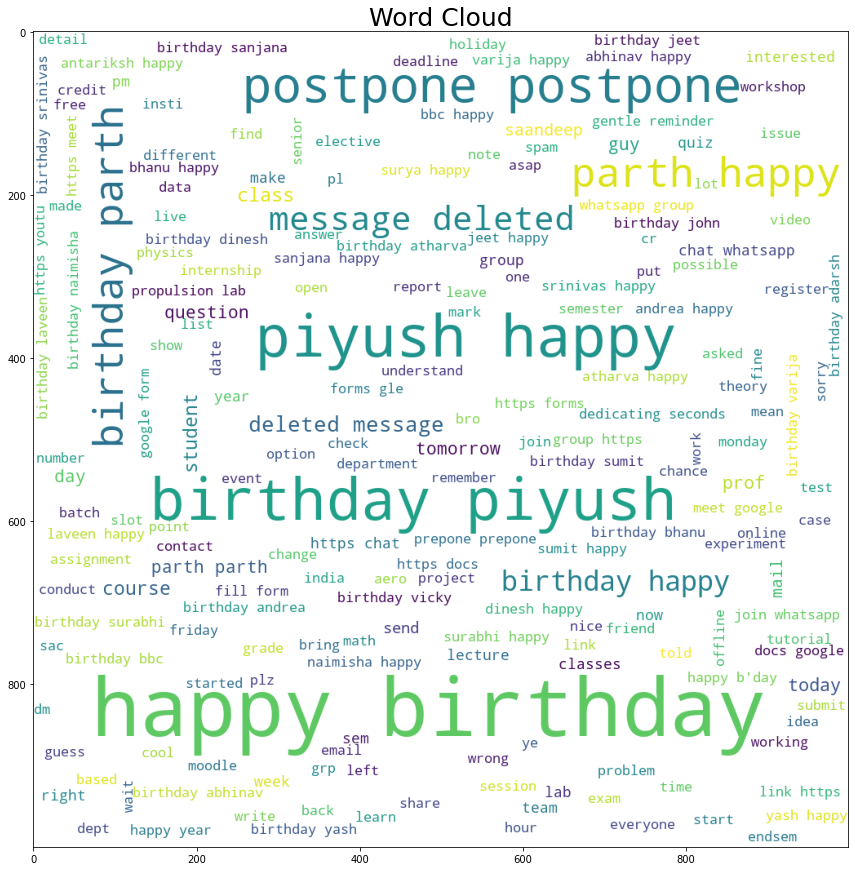

In [ ]:
create_wordcloud('Overall', df)

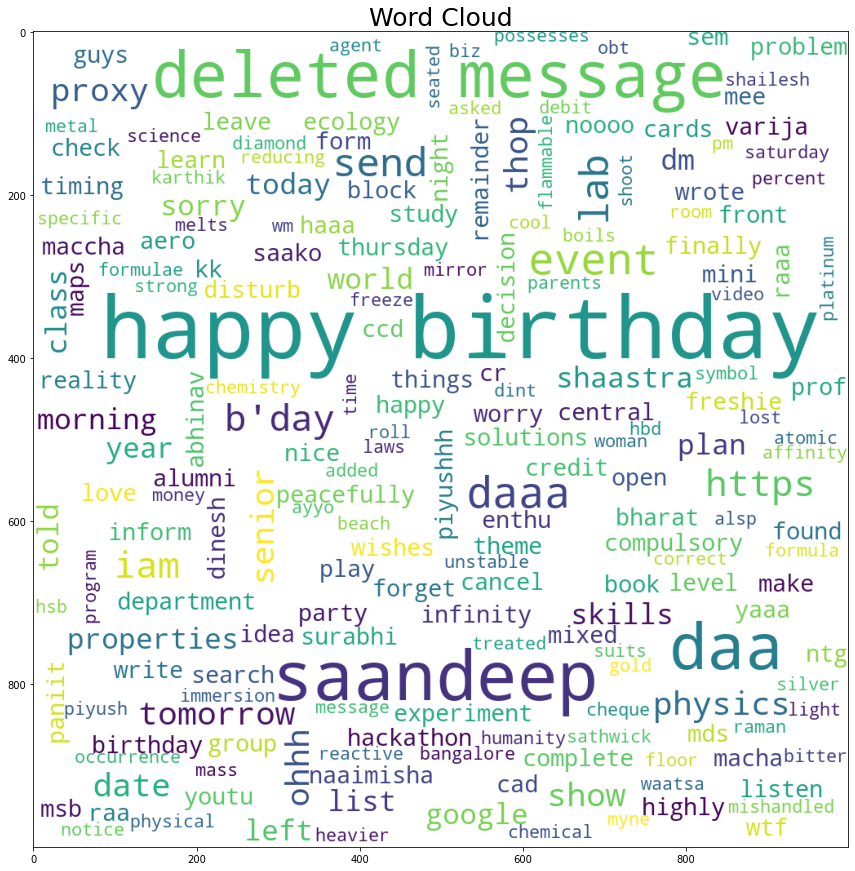

In [ ]:
create_wordcloud('Srinivas N', df)

In [ ]:
def most_common_emoji(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  emojis = []
  for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

  emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
  plt.pie(emoji_df[1].head(), labels = emoji_df[0].head())
  plt.show()

  return emoji_df.head(10)

most_common_emoji(selected_user,df) returns the most common used emoji in the messages of both overall as a group and of a selected user of the group and it is being visualized with a bar graph.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127881 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127881 missing from current font.
  font.se

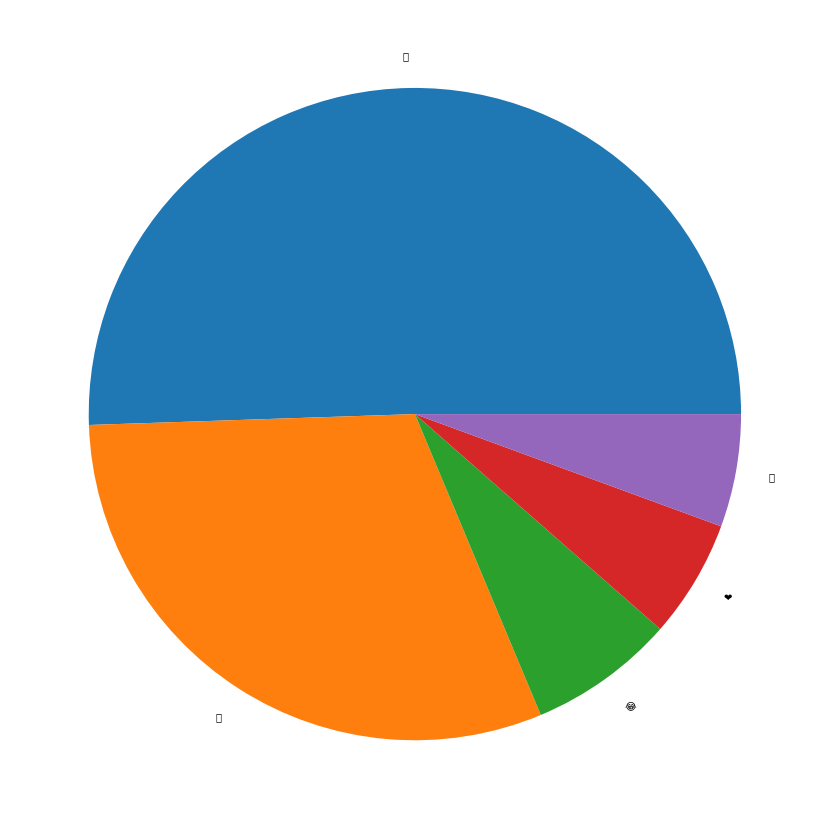

,0,1
0,🥳,10638
1,🔥,6479
2,😂,1524
3,❤,1234
4,🎉,1177
5,🎂,879
6,🎊,496
7,🏻,337
8,🙏,308
9,👍,307


In [ ]:
most_common_emoji('Overall', df)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129395 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128591 missing from current font.
  font.

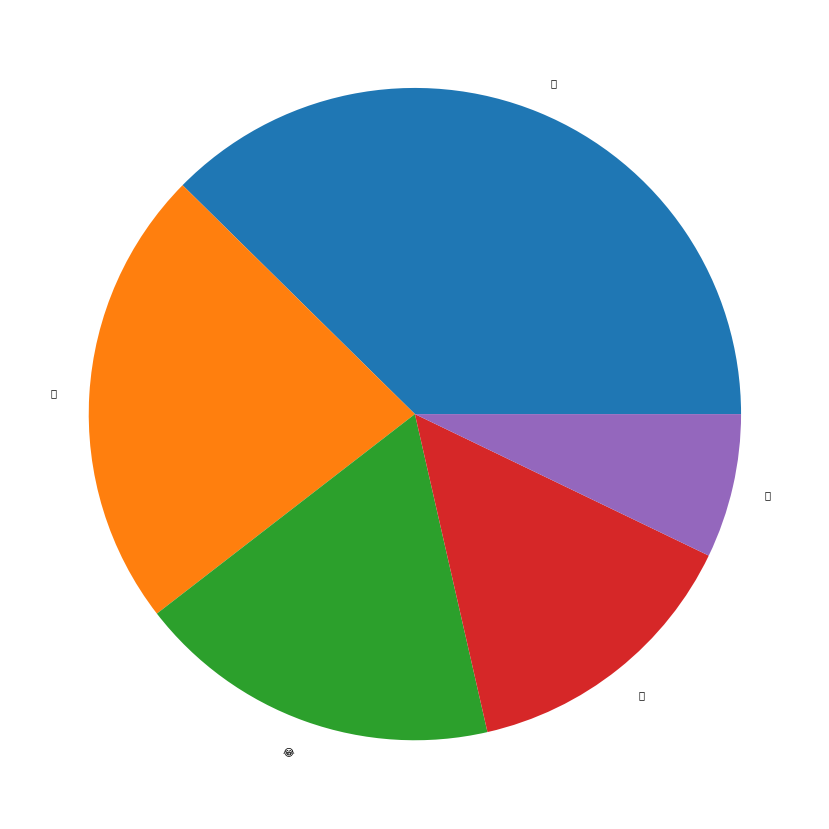

,0,1
0,🥳,79
1,🙏,48
2,😂,38
3,🤣,30
4,🤭,15
5,🤦,11
6,🔥,10
7,🤔,9
8,🏽,9
9,♂,8


In [ ]:
most_common_emoji('Srinivas N', df)

## Timeline Analysis

In [ ]:
def monthly_timeline(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

    timeline['time'] = time

    plt.plot(timeline['time'], timeline['message'], color = 'black')
    plt.xticks(rotation = 'vertical')
    plt.show()

monthly_timeline(selected_user,df) returns a plot of monthly timeline of the messages which depicts how the number of messages varied on monthly basis of both overall as a group and of a selected user of the group.

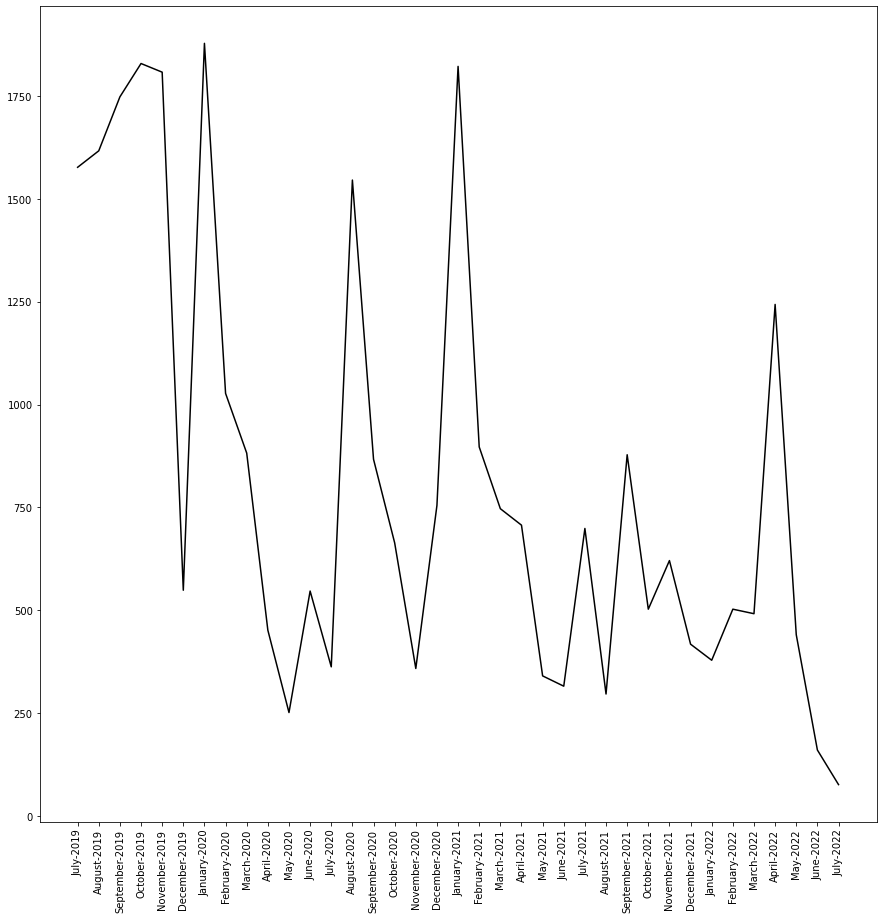

In [ ]:
monthly_timeline('Overall',df)

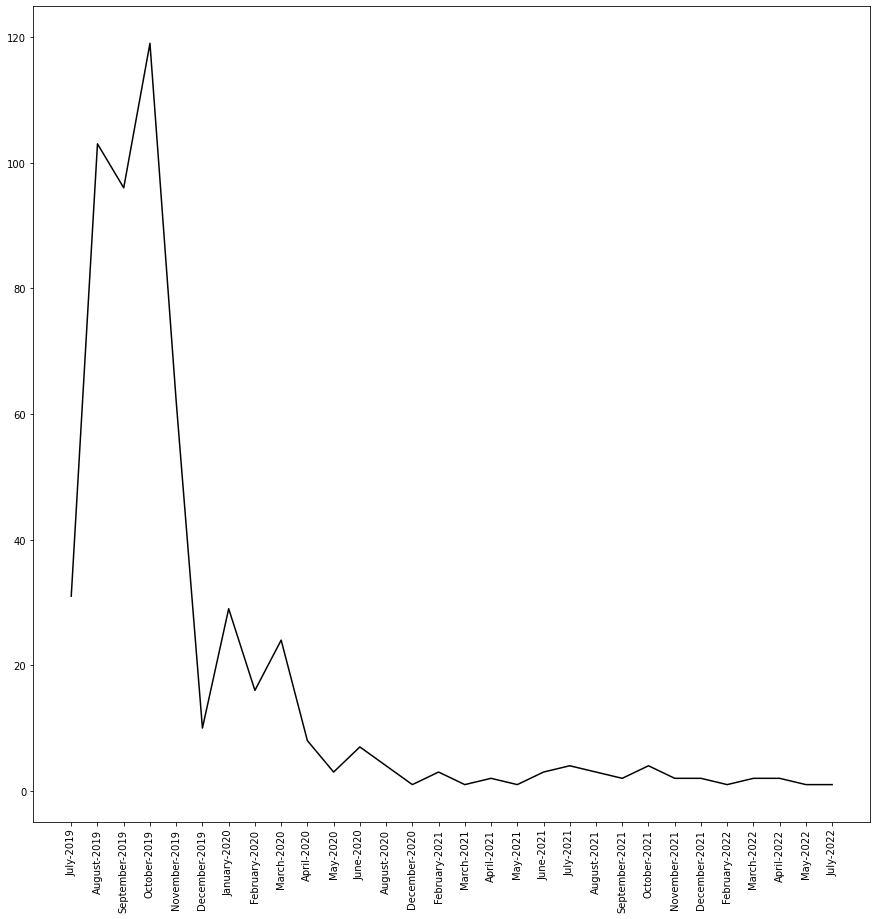

In [ ]:
monthly_timeline('Srinivas N',df)

In [ ]:
def daily_timeline(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  daily_timeline = df.groupby('only_date').count()['message'].reset_index()
  plt.plot(daily_timeline['only_date'], daily_timeline['message'], color = 'yellow')
  plt.xticks(rotation = 'vertical')
  plt.show()

daily_timeline(selected_user,df) returns a plot of daily timeline of the messages which depicts how the number of messages varied on daily basis with dates of different months of both overall as a group and of a selected user of the group.

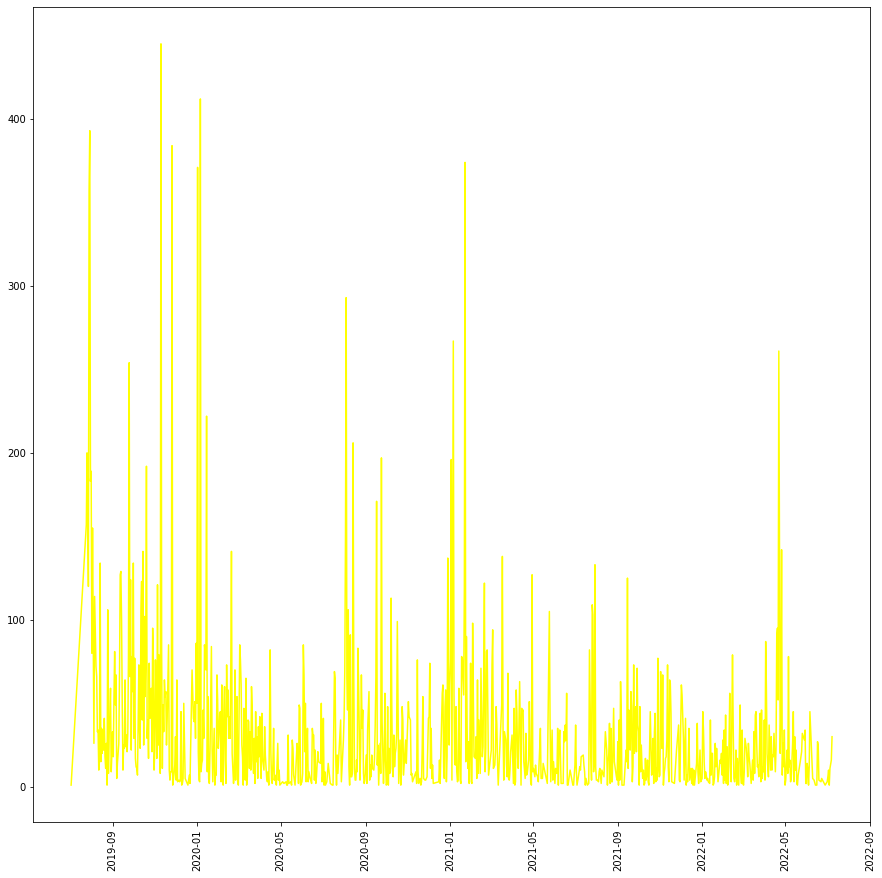

In [ ]:
daily_timeline('Overall',df)

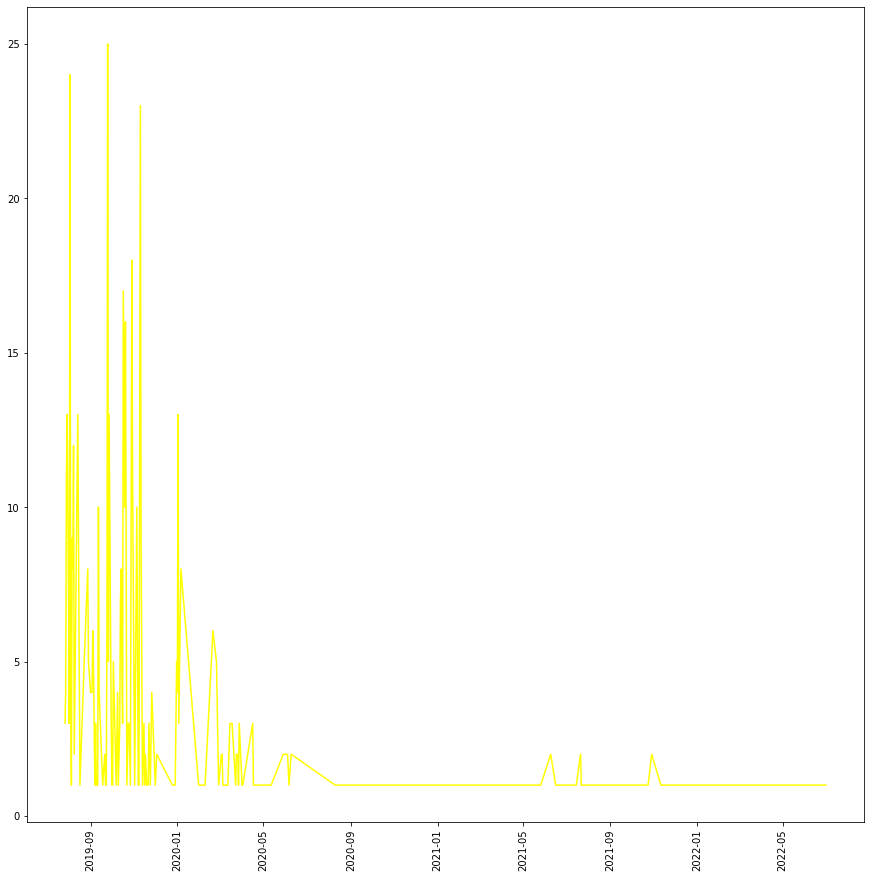

In [ ]:
daily_timeline('Srinivas N',df)

In [ ]:
def week_activity_map(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  busyday = df['day_name'].value_counts()

  plt.bar(busyday.index, busyday.values, color = 'brown')
  plt.show()

week_activity_map(selected_user,df) returns a bar plot of activity of the users on weekly basis from Sunday to Monday and returns how the number of messages vary on each day of the week, of both overall as a group and of a selected user of the group.

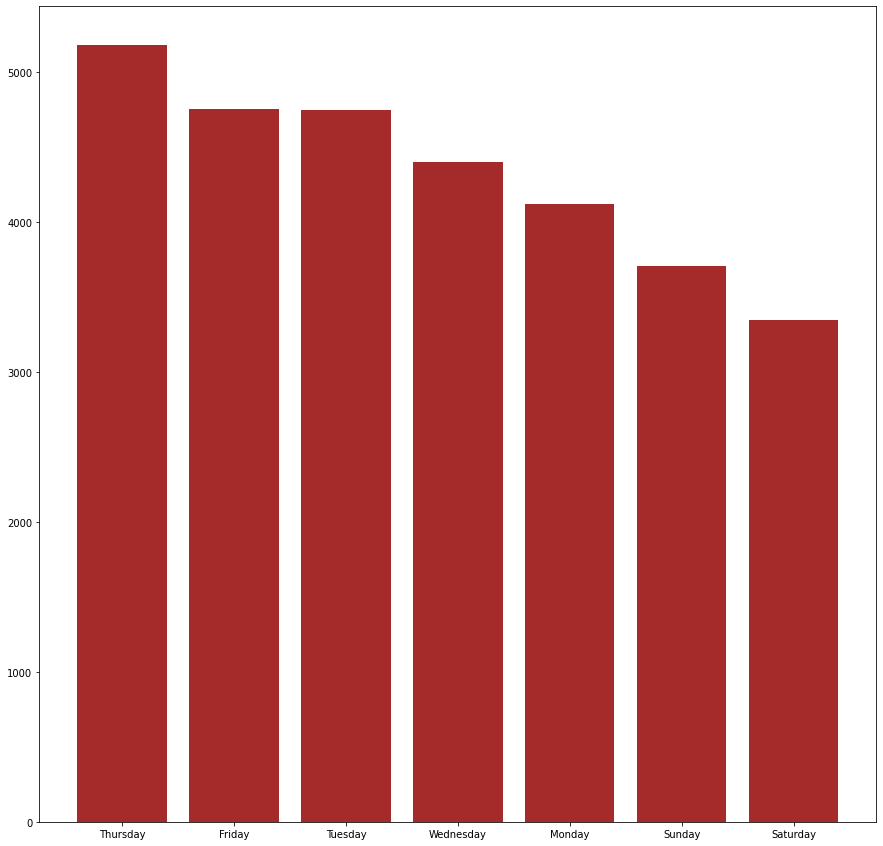

In [ ]:
week_activity_map('Overall',df)

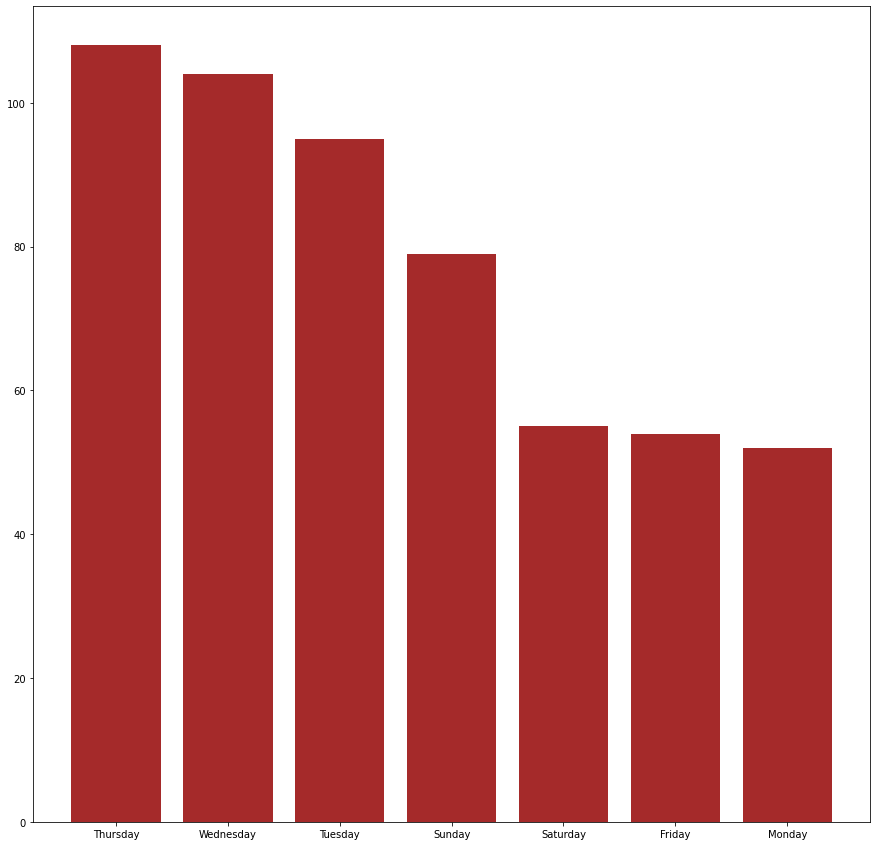

In [ ]:
week_activity_map('Srinivas N',df)

In [ ]:
def month_activity_map(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  busymonth = df['month'].value_counts()
  
  plt.bar(busymonth.index, busymonth.values, color = 'red')
  plt.show()

month_activity_map(selected_user,df) returns a bar plot of activity of the users on monthly basis from January to December and returns how the number of messages vary on each month of the year, of both overall as a group and of a selected user of the group.

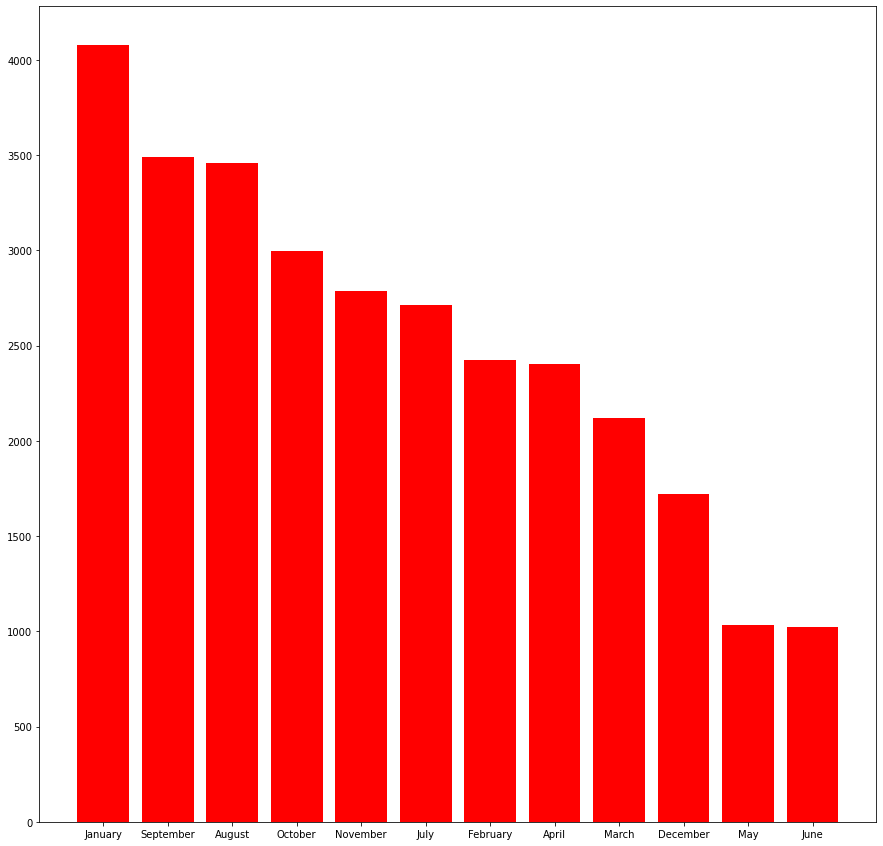

In [ ]:
month_activity_map('Overall',df)

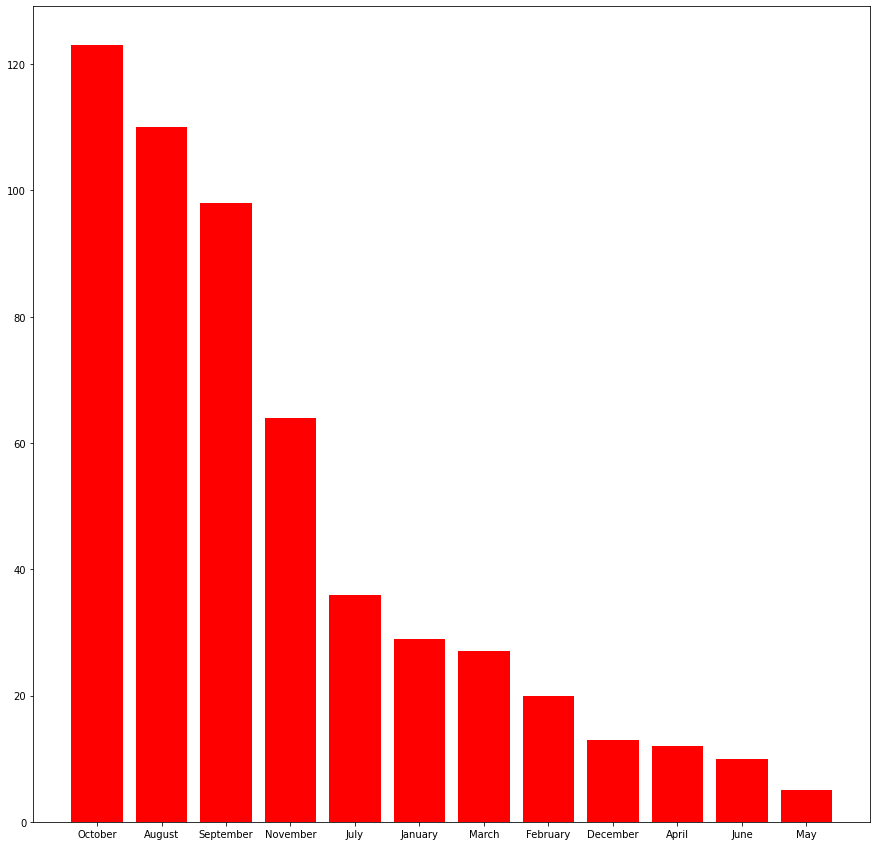

In [ ]:
month_activity_map('Srinivas N',df)

In [ ]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
  if hour == 23:
    period.append(str(hour) + "-" + str('00'))
  elif hour == 0:
    period.append(str('00') + "-" + str(hour + 1))
  else:
    period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period
df.head()

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute,period
0,2019-07-25 08:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2019,July,7,25,2019-07-25,Thursday,8,45,8-9
1,2019-07-03 09:00:00,group_notification,"Amarnaath Iitm created group ""Aero Freshies '1...",2019,July,7,3,2019-07-03,Wednesday,9,0,9-10
2,2019-07-25 08:44:00,group_notification,You joined using this group's invite link\n,2019,July,7,25,2019-07-25,Thursday,8,44,8-9
3,2019-07-25 08:45:00,group_notification,+91 81717 00616 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,8,45,8-9
4,2019-07-25 09:35:00,group_notification,+91 90818 25678 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,9,35,9-10


In [ ]:
def activity_heatmap(selected_user,df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  plt.figure()
  user_heatmap = sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
  plt.yticks(rotation = 'horizontal')
  plt.show()


activity_heatmap(selected_user, df) returns a heatmap of user activity plotted, based on time period of a day (24 hours, from 00 to 23 o' clock) varying with the days of the week from Sunday to Monday and returns how the number of messages vary on each day of the week with the time period, of both overall as a group and of a selected user of the group.

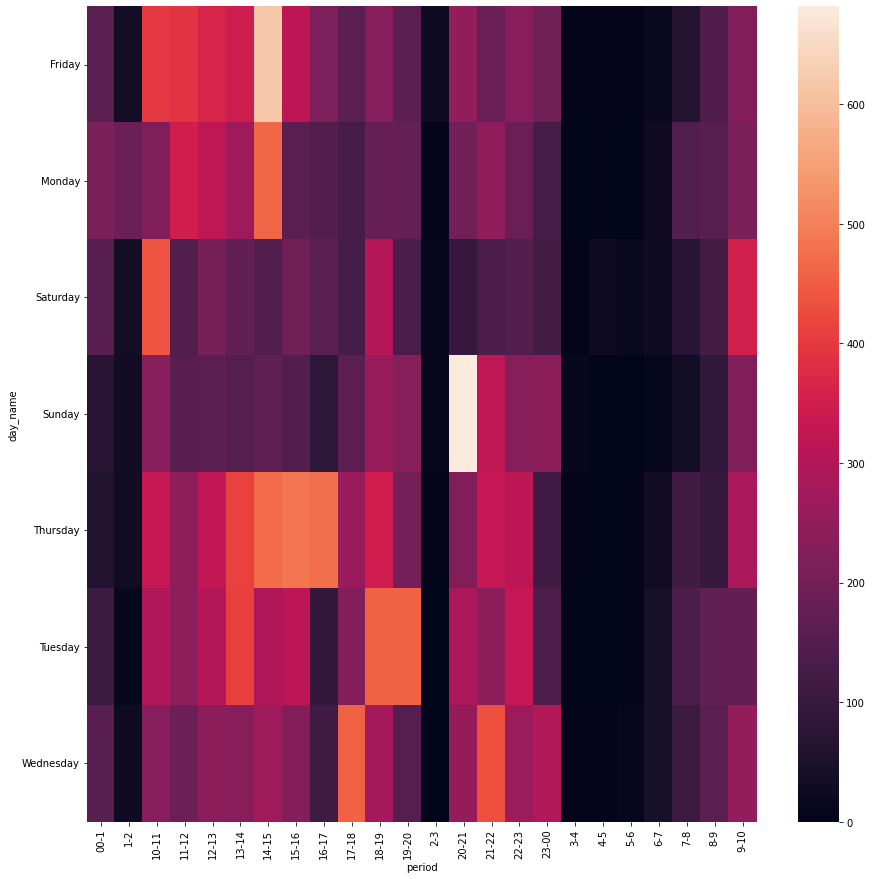

In [ ]:
activity_heatmap('Overall',df)

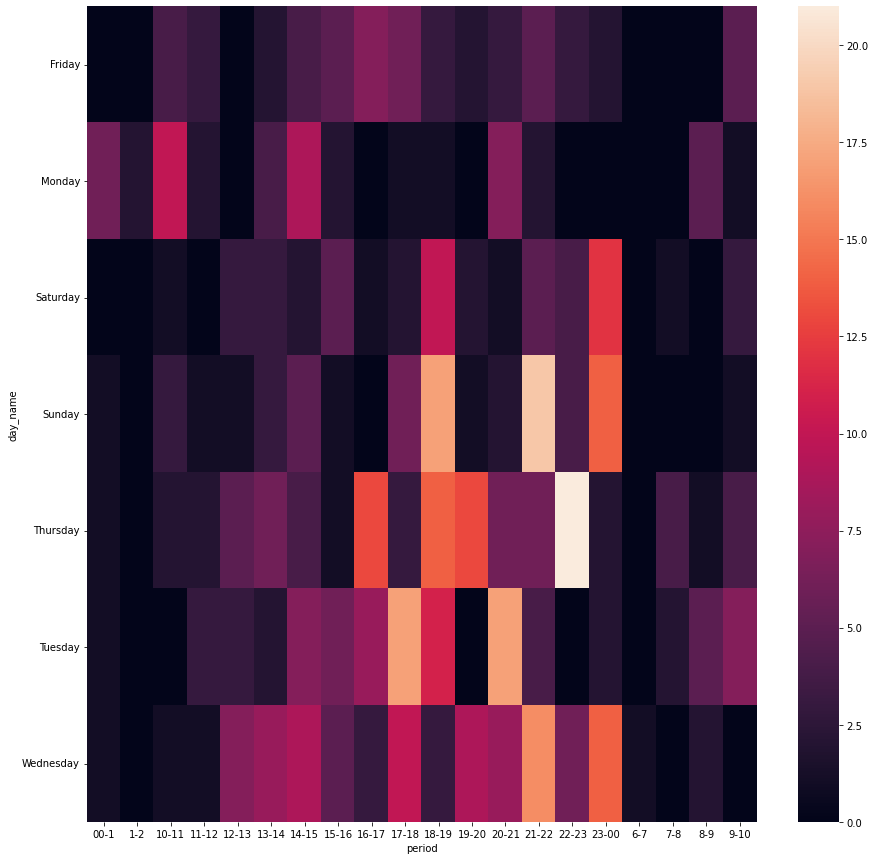

In [ ]:
activity_heatmap('Srinivas N',df)

In [ ]:
df.head()

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute,period
0,2019-07-25 08:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2019,July,7,25,2019-07-25,Thursday,8,45,8-9
1,2019-07-03 09:00:00,group_notification,"Amarnaath Iitm created group ""Aero Freshies '1...",2019,July,7,3,2019-07-03,Wednesday,9,0,9-10
2,2019-07-25 08:44:00,group_notification,You joined using this group's invite link\n,2019,July,7,25,2019-07-25,Thursday,8,44,8-9
3,2019-07-25 08:45:00,group_notification,+91 81717 00616 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,8,45,8-9
4,2019-07-25 09:35:00,group_notification,+91 90818 25678 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,9,35,9-10


## Sentiment Analysis

Importing the SentimentIntensityAnalyzer function from nltk required for the sentiment analysis of the chat.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sentiments = SentimentIntensityAnalyzer()

df['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in df["message"]]
df["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["message"]]
df["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["message"]]

The sentiment of the messages in the chat is being analyzed using polarity scores of the SentimentIntensityAnalyzer libraray and the messages are being divided into Positive, Negative and Neutral from the obtained result and have been updated them as separate new columns in the dataset, df.

In [ ]:
df.head(10)

,date,user,message,year,month,month_num,day,only_date,day_name,hour,minute,period,Positive,Negative,Neutral
0,2019-07-25 08:45:00,group_notification,Messages and calls are end-to-end encrypted. N...,2019,July,7,25,2019-07-25,Thursday,8,45,8-9,0.000,0.084,0.916
1,2019-07-03 09:00:00,group_notification,"Amarnaath Iitm created group ""Aero Freshies '1...",2019,July,7,3,2019-07-03,Wednesday,9,0,9-10,0.250,0.000,0.750
2,2019-07-25 08:44:00,group_notification,You joined using this group's invite link\n,2019,July,7,25,2019-07-25,Thursday,8,44,8-9,0.211,0.000,0.789
3,2019-07-25 08:45:00,group_notification,+91 81717 00616 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,8,45,8-9,0.167,0.000,0.833
4,2019-07-25 09:35:00,group_notification,+91 90818 25678 joined using this group's invi...,2019,July,7,25,2019-07-25,Thursday,9,35,9-10,0.167,0.000,0.833
5,2019-07-25 09:33:00,Shailesh Iitm Aero,Is the HOD talking to you guys rn?\n,2019,July,7,25,2019-07-25,Thursday,9,33,9-10,0.000,0.000,1.000
6,2019-07-25 09:35:00,Muthu Kumar Iitm,It's done now\n,2019,July,7,25,2019-07-25,Thursday,9,35,9-10,0.000,0.000,1.000
7,2019-07-25 09:35:00,+91 90810 02448,No we're free now\n,2019,July,7,25,2019-07-25,Thursday,9,35,9-10,0.440,0.293,0.267
8,2019-07-25 09:35:00,Shailesh Iitm Aero,Aren't you guys supposed to see The Dept facil...,2019,July,7,25,2019-07-25,Thursday,9,35,9-10,0.000,0.000,1.000
9,2019-07-25 09:36:00,+91 90810 02448,"Yes, but that starts at 11\n",2019,July,7,25,2019-07-25,Thursday,9,36,9-10,0.270,0.000,0.730


In [ ]:
def sentiment_analyzer(selected_user, df):
  if selected_user != 'Overall':
    df = df[df['user'] == selected_user]

  x=sum(df["Positive"])
  y=sum(df["Negative"])
  z=sum(df["Neutral"])

  dat = [x, y, z]
  label = ['Positive', 'Negative', 'Neutral']

  plt.pie(dat, labels = label)
  plt.show()

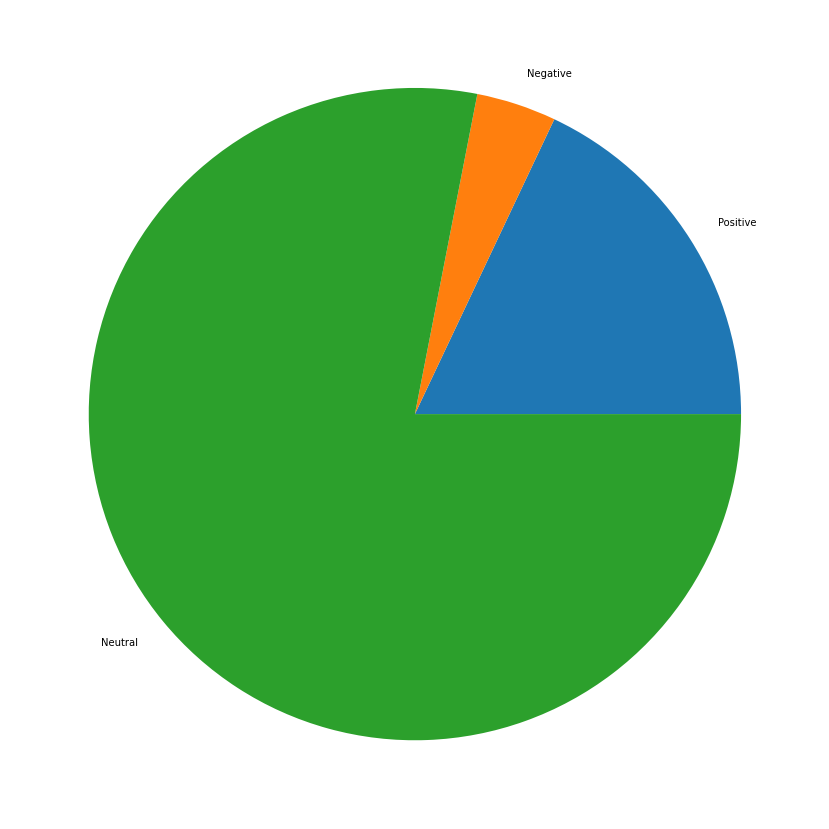

In [ ]:
sentiment_analyzer('Overall', df)

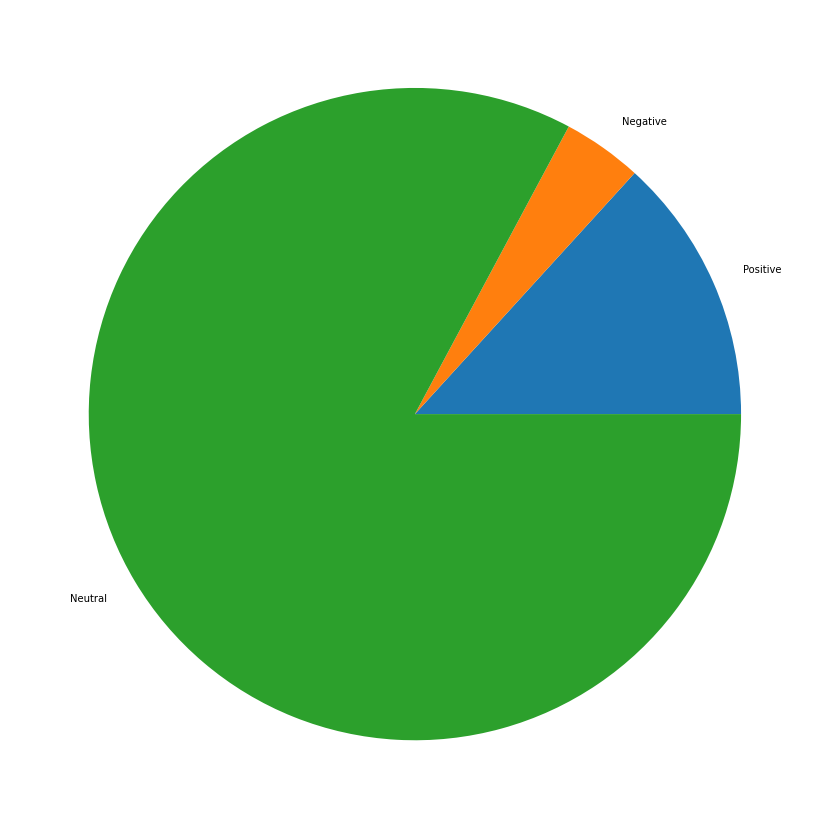

In [ ]:
sentiment_analyzer('Srinivas N', df)